In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from numpy import random
import datetime
import matplotlib.pyplot as plt
import os

In [2]:
np.random.seed(123)

In [3]:
def make_data(df, three_months=24*30*3):
    '''
    df is a dataframe contains only 1 building
    make a random 3-months-9-months split
    '''
    df = df.dropna()
    num_obs = df.shape[0]
    start_idx = np.random.randint(low=0, high=num_obs) #randomly pick a startday
    df = pd.concat([df, df], axis=0)
    X = df.iloc[start_idx: start_idx+three_months].reset_index(drop=True)
    Y = df.iloc[start_idx+three_months: start_idx+num_obs].reset_index(drop=True)
    return X, Y

In [4]:
def naive_model_2(data_path, features):
    '''
    data_dir: dir of per building data
    features: features to use
    fit a RF model to each building
    '''
    files = os.listdir(data_path)
    y_predicted = []
    y_observed = []
    count = 0
    for file in files:
        count += 1
        print(str(count) + ' out of ' + str(len(files)) + ' ' + file)
        df = pd.read_csv(data_path+file, index_col=0, parse_dates=['timestamp'])
        df = df.reset_index(drop=True)
        train, test = make_data(df)
        X_train = train[features]
        y_train = train['electricity']
        X_test = test[features].dropna()
        y_test = test['electricity'].dropna()
        rf = RandomForestRegressor(n_estimators=50,
                               n_jobs=-1,
                               oob_score=True,
                               max_features=0.1, 
                               min_samples_leaf=6,
                               verbose = 0)
        rf.fit(X_train, y_train)
        y_predicted.append(rf.predict(X_test))
        y_observed.append(y_test)
    return y_observed, y_predicted

In [5]:
features = ['date_1', 'date_2', 'date_3', 'date_4',
       'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10', 'date_11',
       'date_12', 'date_13', 'date_14', 'date_15', 'date_16', 'date_17',
       'date_18', 'date_19', 'date_20', 'date_21', 'date_22', 'date_23',
       'date_24', 'date_25', 'date_26', 'date_27', 'date_28', 'date_29',
       'date_30', 'date_31', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'
       ]
data_path = '../data/data_per_building/test/'
y, y_pred = naive_model_2(data_path, features)

1 out of 102 Office_Abigail.csv
2 out of 102 Office_Al.csv
3 out of 102 Office_Alannah.csv
4 out of 102 Office_Autumn.csv
5 out of 102 Office_Bobbi.csv
6 out of 102 Office_Catherine.csv
7 out of 102 Office_Colby.csv
8 out of 102 Office_Cristina.csv
9 out of 102 Office_Elena.csv
10 out of 102 Office_Evelyn.csv
11 out of 102 Office_Garrett.csv
12 out of 102 Office_Gladys.csv
13 out of 102 Office_Glenda.csv
14 out of 102 Office_Jesus.csv
15 out of 102 Office_Jett.csv
16 out of 102 Office_Joni.csv
17 out of 102 Office_Lane.csv
18 out of 102 Office_Lillian.csv
19 out of 102 Office_Madisyn.csv
20 out of 102 Office_Mark.csv
21 out of 102 Office_Martha.csv
22 out of 102 Office_Martin.csv
23 out of 102 Office_Mary.csv
24 out of 102 Office_Mat.csv
25 out of 102 Office_Maximus.csv
26 out of 102 Office_Mikayla.csv
27 out of 102 Office_Paige.csv
28 out of 102 Office_Pasquale.csv
29 out of 102 Office_Paulette.csv
30 out of 102 Office_Penny.csv
31 out of 102 Office_Shari.csv
32 out of 102 Office_Shel

In [6]:
# with open('naivemodel_predicted.txt', 'w') as f:
#     for line in y_pred:
#         f.write("%s\n" % list(line))

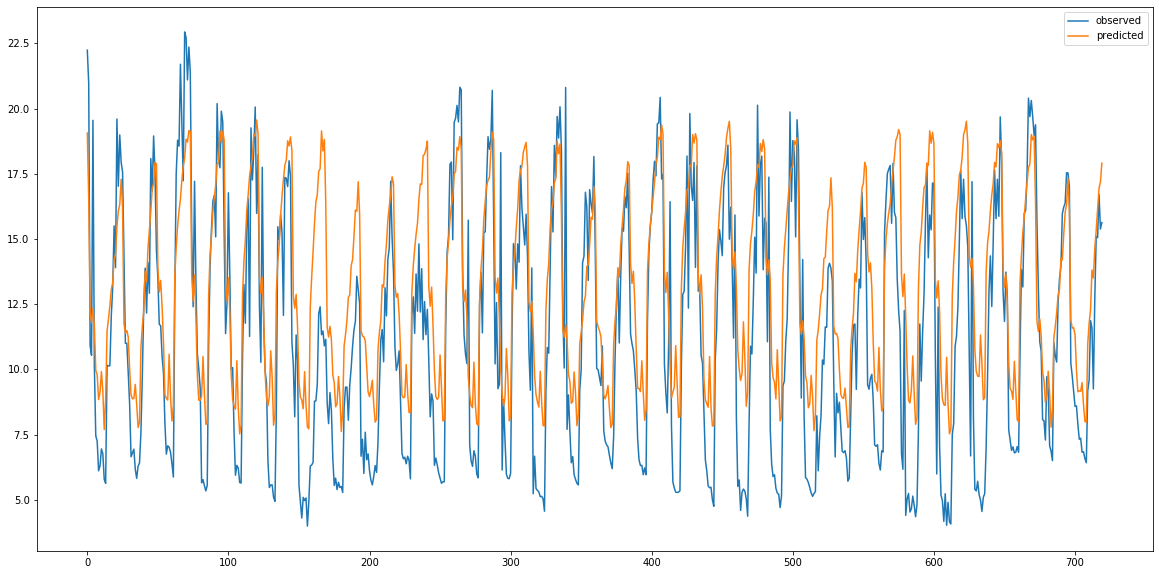

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(y[0][:720], label='observed')
plt.plot(y_pred[0][:720], label='predicted')
plt.legend();

In [8]:
def MAE(y, y_pred):
    s = 0.0
    assert len(y) == len(y_pred)
    for i in range(len(y)):
        s += np.mean(np.abs(y[i] - y_pred[i]))
    return s / len(y)
MAE(y, y_pred)

19.79847172526748

In [9]:
def MSE(y, y_pred):
    s = 0.0
    assert len(y) == len(y_pred)
    for i in range(len(y)):
        s += np.mean(np.square(y[i] - y_pred[i]))
    return s / len(y)
MSE(y, y_pred)

2594.5841522910328

In [10]:
def NMBE(y, y_pred):
    assert len(y) == len(y_pred)
    res = np.array([])
    for i in range(len(y)):
        res = np.append(res, np.mean(y[i] - y_pred[i])*100/np.mean(y[i]))
    return res
nmbe = NMBE(y, y_pred)

In [11]:
def CVRMSE(y, y_pred):
    assert len(y) == len(y_pred)
    res = np.array([])
    for i in range(len(y)):
        res = np.append(res, np.sqrt(np.mean(np.square(y[i] - y_pred[i])))*100/np.mean(y[i]))
    return res
cvrmse = CVRMSE(y, y_pred)

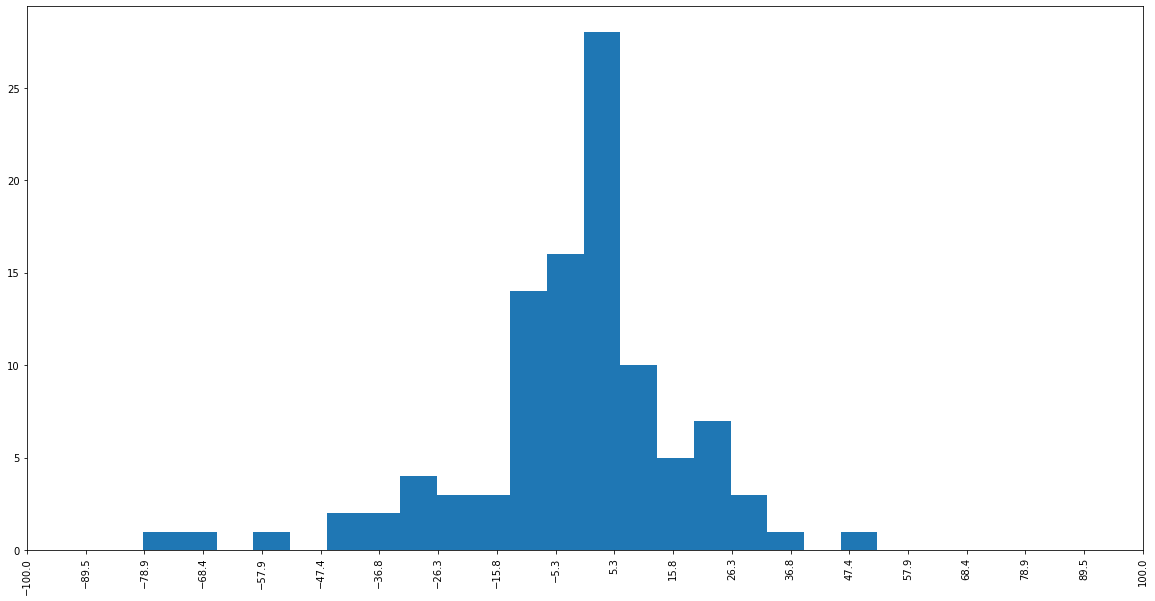

In [12]:
plt.figure(figsize=(20, 10))
plt.hist(nmbe, bins=20)
plt.xticks(np.linspace(-100, 100, 20), rotation='vertical')
plt.xlim([-100, 100]);

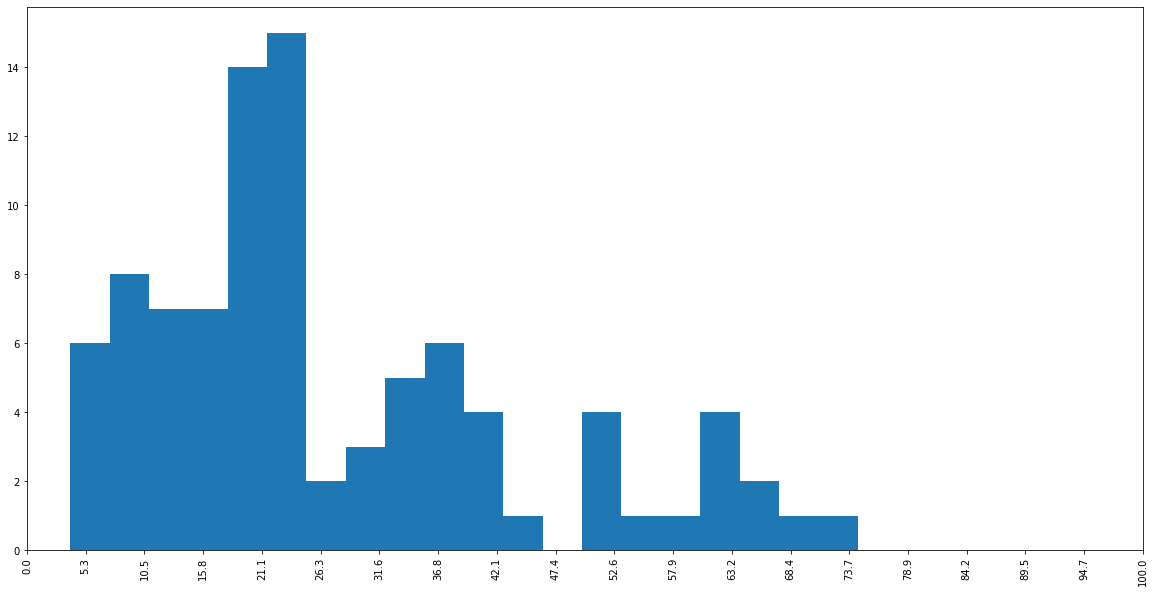

In [13]:
cvrmse.sort()
plt.figure(figsize=(20, 10))
plt.hist(cvrmse[:-10], bins=20)
plt.xticks(np.linspace(0, 100, 20), rotation='vertical')
plt.xlim([0, 100]);